In [1]:
#Aim: Finding carries into finalthird, inside final third and player carries for those who contributed with most carries inside final third
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb
from mplsoccer import Sbopen
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
import gc

In [3]:
parser = Sbopen()
df_competition = parser.competition()
df_matches = parser.match(competition_id=55, season_id=282)
match_id=3943043 
df_events, df_related, df_freeze, df_tactics = parser.event(3943043)
parser.event(3788741)
#get team names
team1, team2 = df_events.team_name.unique()
df_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

In [9]:
df_events.type_name.unique() #Finding different type of events, find 'Carry'

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [5]:
df_events.player_name.unique() # Finding player names used in dataset 

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Bukayo Saka',
       'Unai Simón Mendibil', 'Robin Aime Robert Le Normand',
       'Daniel Carvajal Ramos', 'Jude Bellingham', 'Declan Rice',
       'Daniel Olmo Carvajal', 'Álvaro Borja Morata Martín',
       'Lamine Yamal Nasraoui Ebana', 'Marc Guehi', 'Phil Foden',
       'Rodrigo Hernández Cascante', 'Aymeric Laporte', 'Kyle Walker',
       'Luke Shaw', 'Harry Kane', 'John Stones',
       'Nicholas Williams Arthuer', 'Marc Cucurella Saseta',
       'Fabián Ruiz Peña', 'Martín Zubimendi Ibáñez', 'Ollie Watkins',
       'Mikel Oyarzabal Ugarte', 'Cole Palmer',
       'José Ignacio Fernández Iglesias', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

In [67]:
# Filter df for carries
carries = df_events[df_events['type_name'] == 'Carry']
carries = carries[['player_id', 'player_name', 'period', 'minute', 'x', 'y', 'end_x', 'end_y', 
                 'pass_recipient_id', 'pass_recipient_name', 'team_name', 'outcome_id', 
                 'outcome_name', 'team_id', 'pass_length']]
carry_into_finalthird = carries[(carries['x'] < 80) & (carries['end_x'] >= 80)] # filter df for carries which ends in finalthird(x_end location is hisher than 80)
carry_into_finalthird_team1=carry_into_finalthird[carry_into_finalthird['team_name']==team1] # for Spain
carry_into_finalthird_team2=carry_into_finalthird[carry_into_finalthird['team_name']==team2] # for England
carry_into_finalthird_team1 # printing df for Spain

,player_id,player_name,period,minute,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,team_name,outcome_id,outcome_name,team_id,pass_length
261,6655.0,Fabián Ruiz Peña,1,5,79.5,5.8,83.7,15.7,NaN,NaN,Spain,NaN,NaN,772,NaN
694,16532.0,Daniel Olmo Carvajal,1,18,78.2,20.2,92.8,22.4,NaN,NaN,Spain,NaN,NaN,772,NaN
881,316046.0,Lamine Yamal Nasraoui Ebana,1,22,70.0,72.2,83.9,63.2,NaN,NaN,Spain,NaN,NaN,772,NaN
1240,4353.0,Aymeric Laporte,1,33,54.6,24.5,83.3,23.3,NaN,NaN,Spain,NaN,NaN,772,NaN
1312,22128.0,Robin Aime Robert Le Normand,1,35,67.4,53.4,83.7,64.7,NaN,NaN,Spain,NaN,NaN,772,NaN
1364,4353.0,Aymeric Laporte,1,37,69.6,28.1,85.3,18.2,NaN,NaN,Spain,NaN,NaN,772,NaN
1400,4353.0,Aymeric Laporte,1,37,64.7,40.6,84.4,29.6,NaN,NaN,Spain,NaN,NaN,772,NaN
2127,316046.0,Lamine Yamal Nasraoui Ebana,2,54,79.0,49.2,83.9,50.6,NaN,NaN,Spain,NaN,NaN,772,NaN
2684,24921.0,Martín Zubimendi Ibáñez,2,71,63.6,39.9,88.9,36.4,NaN,NaN,Spain,NaN,NaN,772,NaN
2868,24921.0,Martín Zubimendi Ibáñez,2,77,77.2,18.8,83.7,12.2,NaN,NaN,Spain,NaN,NaN,772,NaN


In [43]:
# Group by player and count carries for Spain
carries_into_finalthird_per_player_team1 = carry_into_finalthird_team1.groupby('player_name').size().reset_index(name='carries_count')
# Sort the carries count in descending order
sorted_carries_into_finalthird_team1 = carries_into_finalthird_per_player_team1.sort_values(by='carries_count', ascending=False)
sorted_carries_into_finalthird_team1

,player_name,carries_count
0,Aymeric Laporte,3
4,Martín Zubimendi Ibáñez,3
1,Daniel Olmo Carvajal,2
2,Fabián Ruiz Peña,2
3,Lamine Yamal Nasraoui Ebana,2
5,Nicholas Williams Arthuer,1
6,Robin Aime Robert Le Normand,1


In [45]:
# Group by player and count carries for England
carries_into_finalthird_per_player_team2 = carry_into_finalthird_team2.groupby('player_name').size().reset_index(name='carries_count')
# Sort the carries count in descending order
sorted_carries_into_finalthird_team2 = carries_into_finalthird_per_player_team2.sort_values(by='carries_count', ascending=False)
sorted_carries_into_finalthird_team2

,player_name,carries_count
0,Bukayo Saka,4
4,Jude Bellingham,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
5,Luke Shaw,1
6,Phil Foden,1


In [85]:
#look at carries inside finalthird for Spain, important: different measure. Carries inside finalthird
carries_in_finalthird=carries[carries['x'] >=80] #filter for carries which starts inside finalthird('x'is more than 80).
carries_in_finalthird_team1=carries_in_finalthird[carries_in_finalthird['team_name']==team1]
carries_in_finalthird_team1

,player_id,player_name,period,minute,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,team_name,outcome_id,outcome_name,team_id,pass_length
60,316046.0,Lamine Yamal Nasraoui Ebana,1,1,97.1,71.6,98.3,65.4,NaN,NaN,Spain,NaN,NaN,772,NaN
195,16532.0,Daniel Olmo Carvajal,1,4,80.4,66.3,91.4,68.5,NaN,NaN,Spain,NaN,NaN,772,NaN
201,68574.0,Nicholas Williams Arthuer,1,4,103.8,8.0,100.7,10.4,NaN,NaN,Spain,NaN,NaN,772,NaN
241,68574.0,Nicholas Williams Arthuer,1,5,91.6,23.6,92.4,23.2,NaN,NaN,Spain,NaN,NaN,772,NaN
245,17620.0,Marc Cucurella Saseta,1,5,112.6,10.0,110.4,8.4,NaN,NaN,Spain,NaN,NaN,772,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,68574.0,Nicholas Williams Arthuer,2,83,96.2,46.1,95.0,51.6,NaN,NaN,Spain,NaN,NaN,772,NaN
3141,16532.0,Daniel Olmo Carvajal,2,84,100.7,51.0,101.2,51.0,NaN,NaN,Spain,NaN,NaN,772,NaN
3146,68574.0,Nicholas Williams Arthuer,2,84,98.6,47.4,101.4,45.6,NaN,NaN,Spain,NaN,NaN,772,NaN
3166,316046.0,Lamine Yamal Nasraoui Ebana,2,84,106.8,56.0,117.9,57.4,NaN,NaN,Spain,NaN,NaN,772,NaN


In [87]:
antall_rader = len(carries_in_finalthird_team1) #Checks number of rows
print(f"Antall rader: {antall_rader}")


Antall rader: 128


In [91]:
#look at carries inside finalthird for England
carries_in_finalthird=carries[carries['x'] >=80]
carries_in_finalthird_team2=carries_in_finalthird[carries_in_finalthird['team_name']==team2]
carries_in_finalthird_team2

,player_id,player_name,period,minute,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,team_name,outcome_id,outcome_name,team_id,pass_length
552,22084.0,Bukayo Saka,1,14,83.8,50.7,97.6,56.5,NaN,NaN,England,NaN,NaN,768,NaN
555,3205.0,Kyle Walker,1,14,116.7,56.5,117.1,56.5,NaN,NaN,England,NaN,NaN,768,NaN
611,30714.0,Jude Bellingham,1,16,96.0,24.5,93.1,19.6,NaN,NaN,England,NaN,NaN,768,NaN
615,3382.0,Luke Shaw,1,16,93.7,11.2,106.1,9.0,NaN,NaN,England,NaN,NaN,768,NaN
641,22084.0,Bukayo Saka,1,16,92.7,73.4,100.2,57.5,NaN,NaN,England,NaN,NaN,768,NaN
647,4354.0,Phil Foden,1,16,97.8,48.3,99.5,46.5,NaN,NaN,England,NaN,NaN,768,NaN
920,99174.0,Kobbie Mainoo,1,24,81.4,59.5,84.1,48.5,NaN,NaN,England,NaN,NaN,768,NaN
924,10955.0,Harry Kane,1,24,84.3,29.9,85.2,28.5,NaN,NaN,England,NaN,NaN,768,NaN
928,3382.0,Luke Shaw,1,24,102.8,19.2,104.3,20.0,NaN,NaN,England,NaN,NaN,768,NaN
931,3382.0,Luke Shaw,1,24,104.3,20.0,100.2,25.7,NaN,NaN,England,NaN,NaN,768,NaN


In [93]:
antall_rader = len(carries_in_finalthird_team2)
print(f"Antall rader: {antall_rader}")


Antall rader: 59


In [95]:
carries_into_finalthird_per_player_team1

,player_name,carries_count
0,Aymeric Laporte,3
1,Daniel Olmo Carvajal,2
2,Fabián Ruiz Peña,2
3,Lamine Yamal Nasraoui Ebana,2
4,Martín Zubimendi Ibáñez,3
5,Nicholas Williams Arthuer,1
6,Robin Aime Robert Le Normand,1


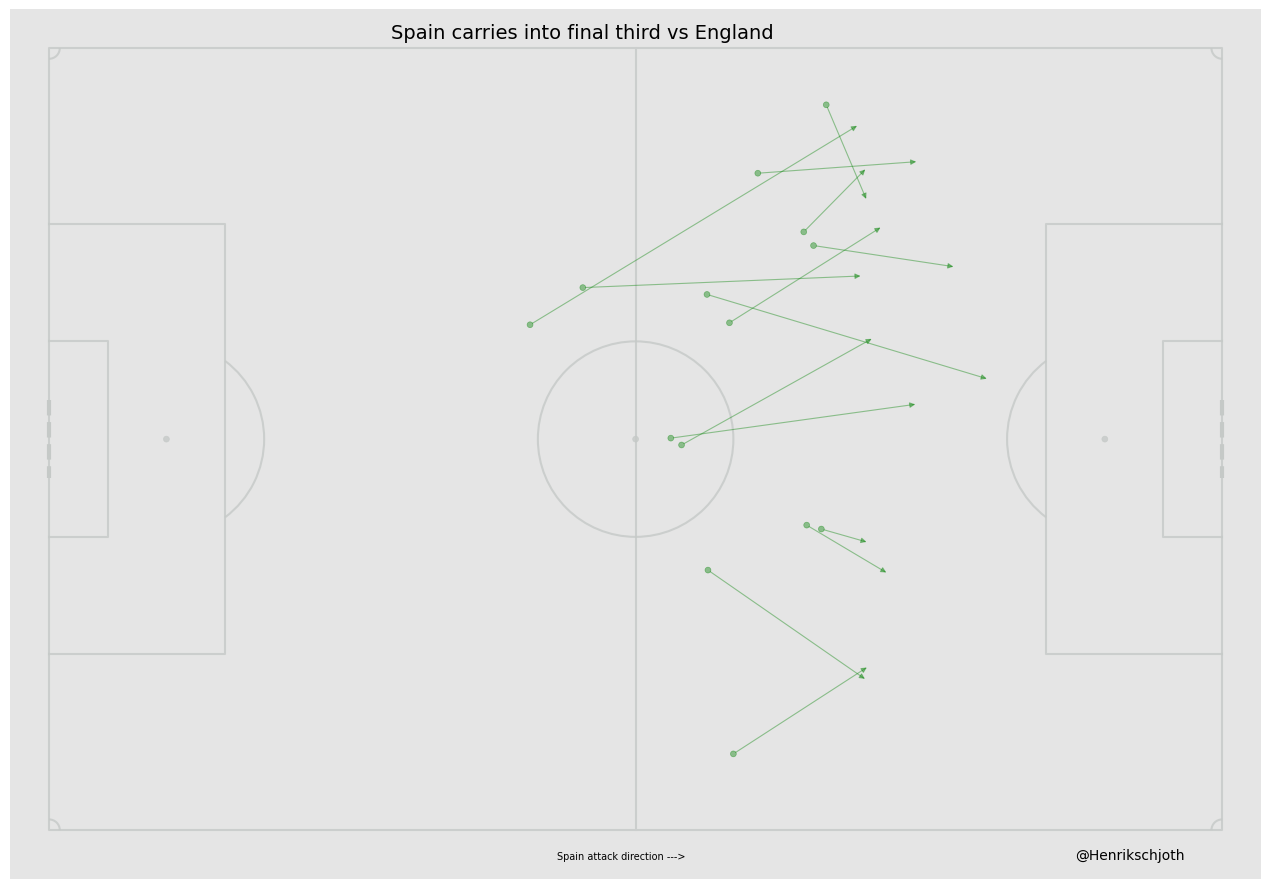

In [127]:
# Aim to create visual of all Spain carries into final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=False)
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carry_into_finalthird_team1.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    if pd.isnull(row['outcome_name']):  # checks if carry succeeded
            color = 'green'
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
            carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax.add_patch(circle)
            ax.add_patch(carryArrow)
# Add title
ax.text(35, -1, 'Spain carries into final third vs ' + team2, fontsize=14, color='black')
fontsize=7 
color='black'
ax.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_intofinalthirdteam1.jpg', dpi=300)

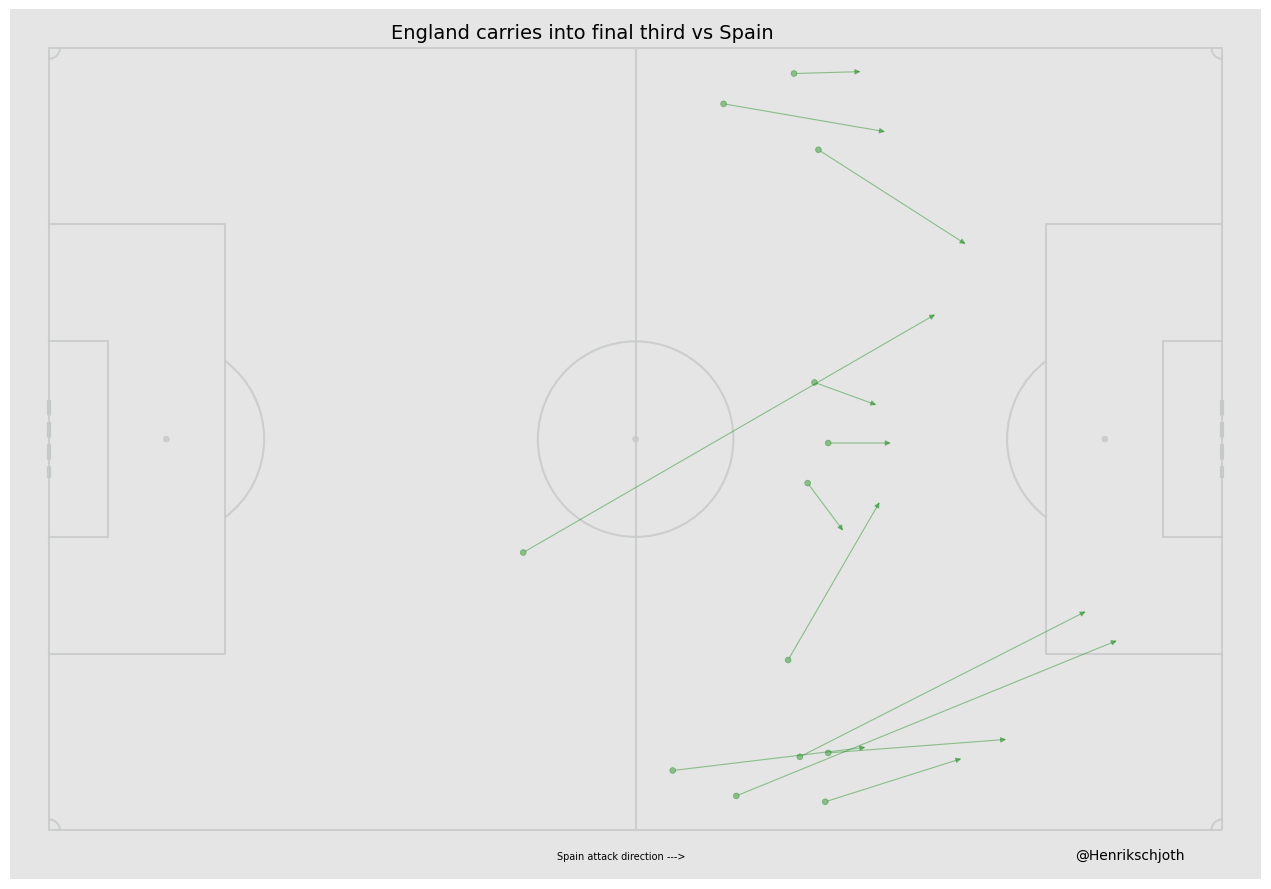

In [125]:
# Aim to create visual of all England carries into final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=False)
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carry_into_finalthird_team2.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    if pd.isnull(row['outcome_name']):  # checks if carry succeeded
            color = 'green'
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
            carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax.add_patch(circle)
            ax.add_patch(carryArrow)
# Add title
ax.text(35, -1, 'England carries into final third vs ' + team1, fontsize=14, color='black')
fontsize=7 
color='black'
ax.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_intofinalthirdteam2.jpg', dpi=300)

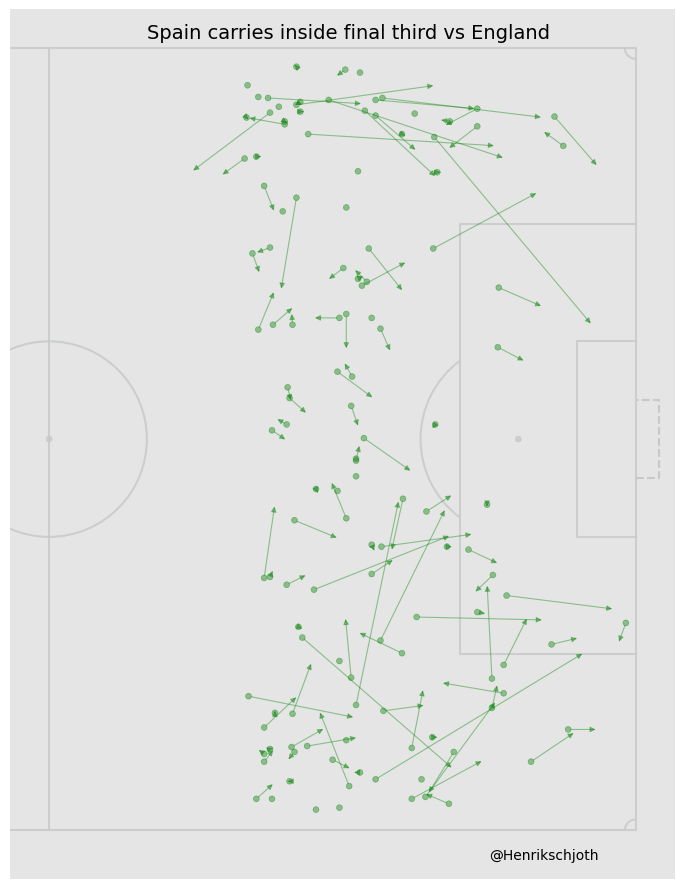

In [123]:
# Aim to create visual of all Spain carries inside final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=True, goal_type='box')
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carries_in_finalthird_team1.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    if pd.isnull(row['outcome_name']):  # checks if carry succeeded
            color = 'green'
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
            carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax.add_patch(circle)
            ax.add_patch(carryArrow)
# Add title
ax.text(70, -1, 'Spain carries inside final third vs ' + team2, fontsize=14, color='black')
fontsize=7 
color='black'
#ax.text(62, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_insidefinalthirdteam1.jpg', dpi=300)

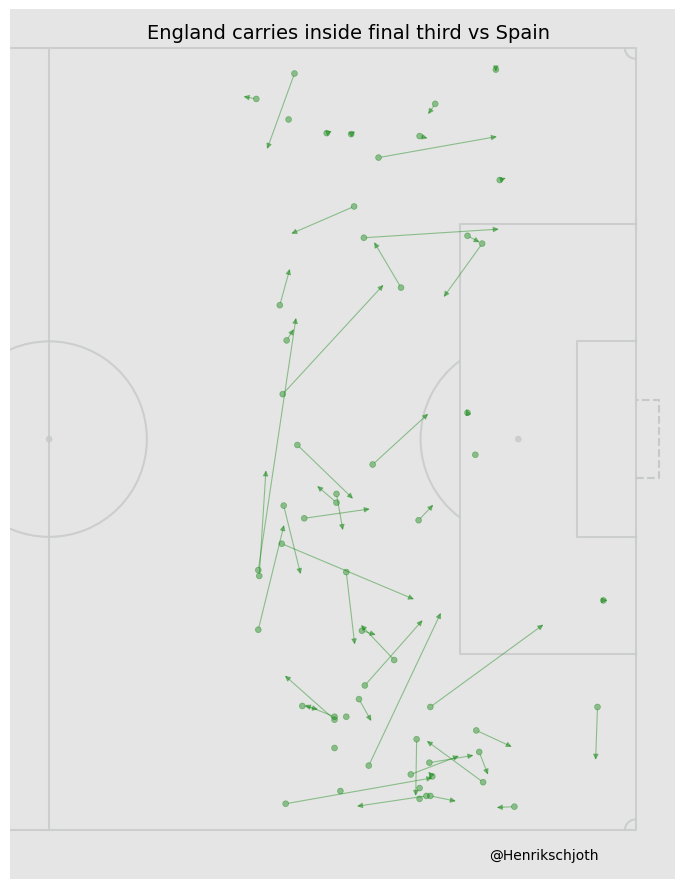

In [121]:
# Aim to create visual of all Englands carries inside final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=True, goal_type='box')
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carries_in_finalthird_team2.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    if pd.isnull(row['outcome_name']):  # checks if carry succeeded
            color = 'green'
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
            carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax.add_patch(circle)
            ax.add_patch(carryArrow)
# Add title
ax.text(70, -1, 'England carries inside final third vs ' + team1, fontsize=14, color='black')
fontsize=7 
color='black'
#ax.text(62, 83, team2 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)

#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_insidefinalthirdteam2.jpg', dpi=300)

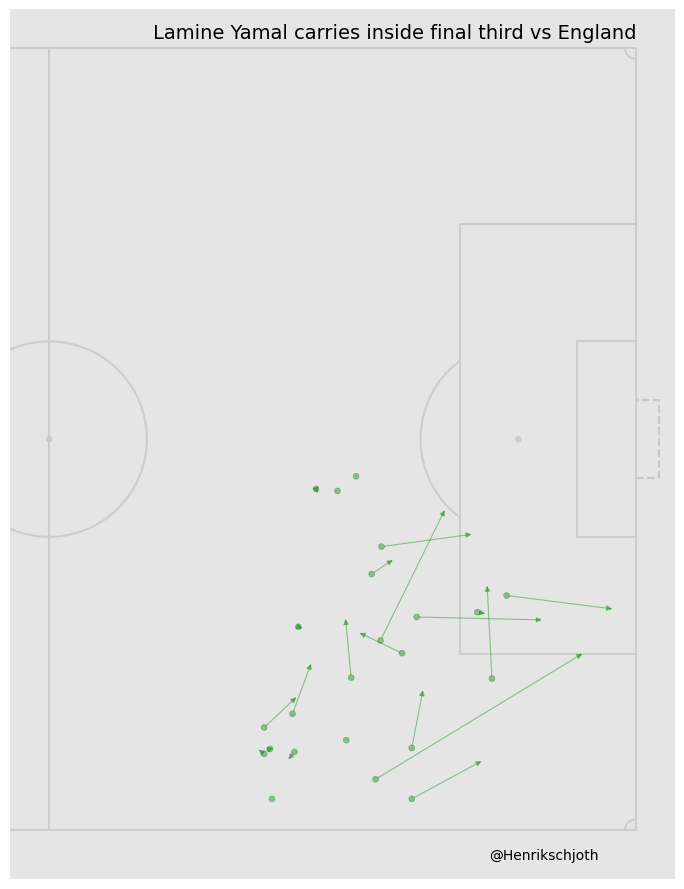

In [149]:
# Aim to create visual of all Spain carries inside final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=True, goal_type='box')
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carries_in_finalthird_team1.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    color='red'
    if row['player_name'] == 'Lamine Yamal Nasraoui Ebana':
        if pd.isnull(row['outcome_name']):  # checks if carry succeeded        
            color = 'green'
        circle = Circle((x, y), circleSize, color=color, alpha=alpha)
        carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                        color=color, alpha=alpha, linewidth=width, 
                        arrowstyle='-|>', mutation_scale=8)
            
        ax.add_patch(circle)
        ax.add_patch(carryArrow)
# Add title
ax.text(70, -1, ' Lamine Yamal carries inside final third vs ' + team2, fontsize=14, color='black')
fontsize=7 
color='black'
#ax.text(62, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_player_lamineyamal.jpg', dpi=300)

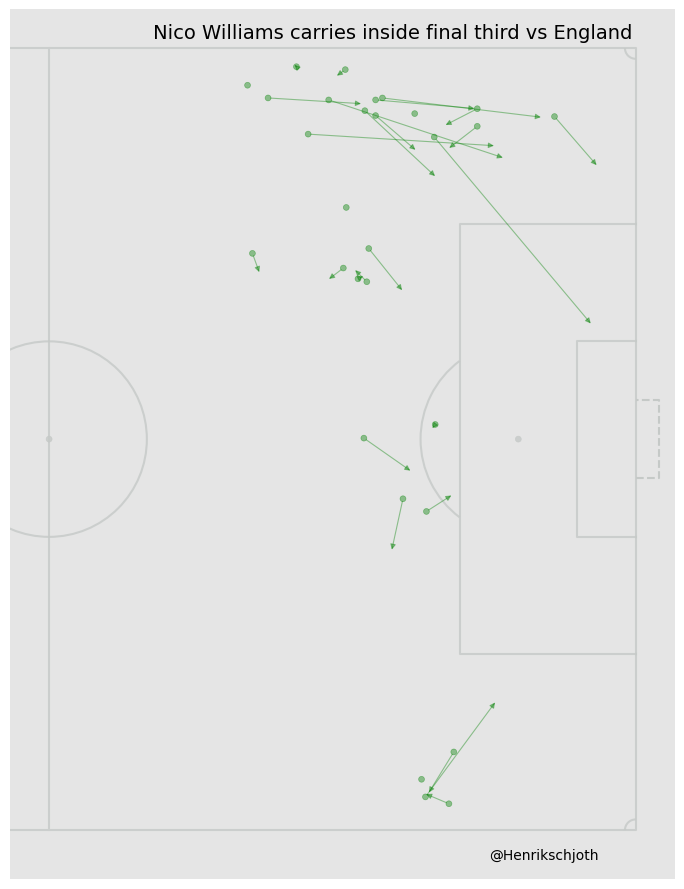

In [147]:
# Aim to create visual of all Nico Williams carries inside final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=True, goal_type='box')
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carries_in_finalthird_team1.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    color='red'
    if row['player_name'] == 'Nicholas Williams Arthuer':
        if pd.isnull(row['outcome_name']):  # checks if carry succeeded        
            color = 'green'
        circle = Circle((x, y), circleSize, color=color, alpha=alpha)
        carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                        color=color, alpha=alpha, linewidth=width, 
                        arrowstyle='-|>', mutation_scale=8)
            
        ax.add_patch(circle)
        ax.add_patch(carryArrow)
# Add title
ax.text(70, -1, ' Nico Williams carries inside final third vs ' + team2, fontsize=14, color='black')
fontsize=7 
color='black'
#ax.text(62, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_player_nico_williams.jpg', dpi=300)

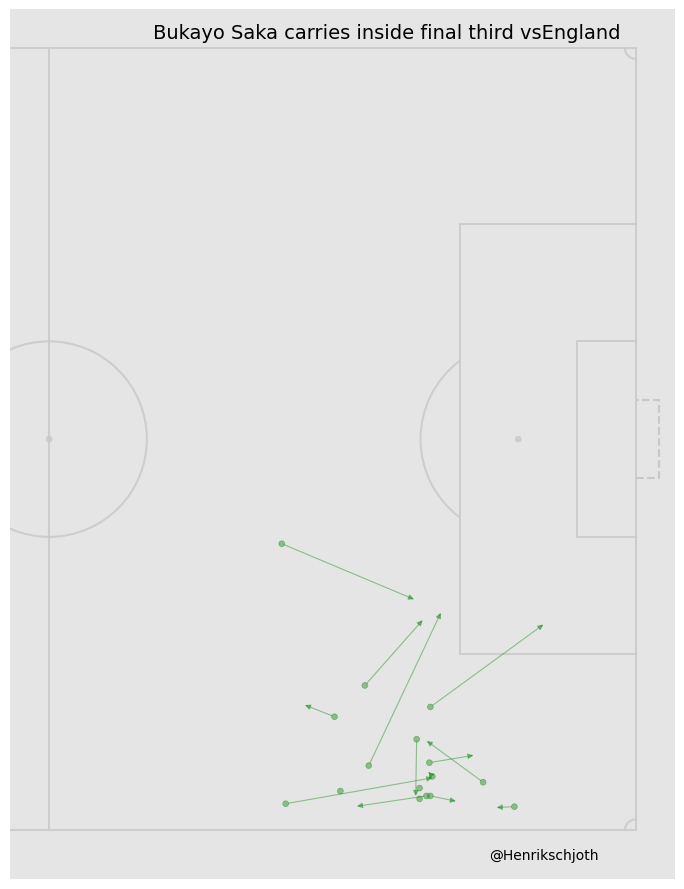

In [145]:
# Aim to create visual of all Bukayo Saka carries inside final third
plt.style.use('ggplot')
# Fixing pitch-specs
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=True, goal_type='box')
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensions
pitchWidthY = 80  
pitchLengthX = 120  


# Plots each carry
for i, row in carries_in_finalthird_team2.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    alpha = 0.4
    width = 0.8
    color='red'
    if row['player_name'] == 'Bukayo Saka':
        if pd.isnull(row['outcome_name']):  # checks if carry succeeded        
            color = 'green'
        circle = Circle((x, y), circleSize, color=color, alpha=alpha)
        carryArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                        color=color, alpha=alpha, linewidth=width, 
                        arrowstyle='-|>', mutation_scale=8)
            
        ax.add_patch(circle)
        ax.add_patch(carryArrow)
# Add title
ax.text(70, -1, ' Bukayo Saka carries inside final third vs' + team2, fontsize=14, color='black')
fontsize=7 
color='black'
#ax.text(62, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\carries_player_bukayo_saka.jpg', dpi=300)